In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#  Fashion MNIST dataset 호출
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f'Training images shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing images shape: {x_test.shape}')
print(f'Testing labels shape: {y_test.shape}')

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


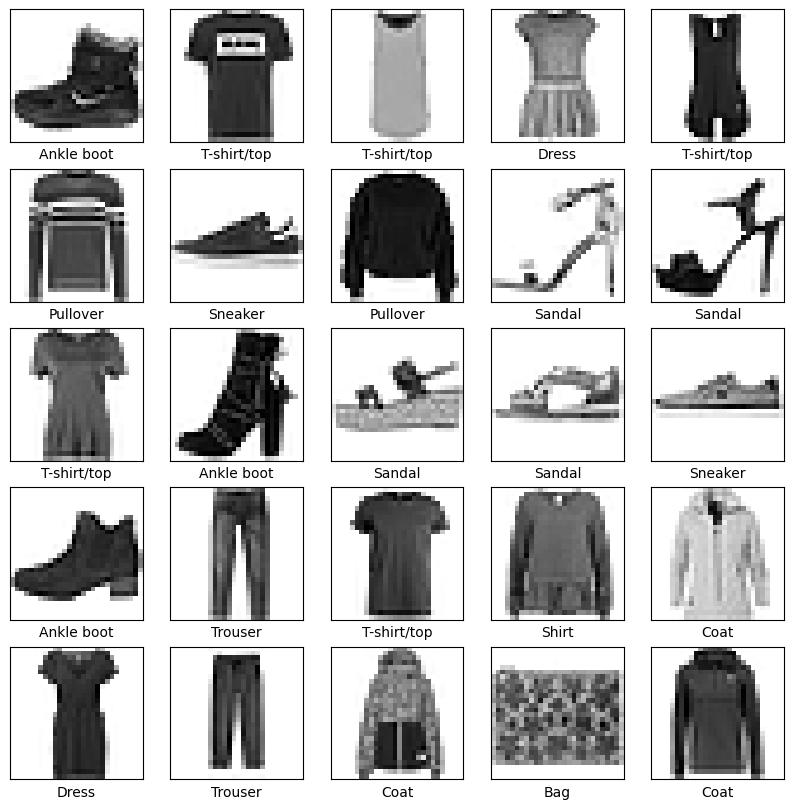

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# 이미지 normalize -> 픽셀 값이 0~255 사이의 값을 갖는데, 0-1 사이의 값을 갖도록 정규화
# 균일한 값을 갖도록 정규화함으로써 빠르고 효율적인 학습
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN 입력을 위해 입력 셰이프 재가공
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Fashion MNIST dataset은 10개의 상품 클래스가 존재
num_classes = 10
batch_size = 500
epochs = 10

In [ ]:
# 모델 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# 모델 컴파일
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# 과적합 방지
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# 모델 학습
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/10
120/120 [==============================] - 53s 416ms/step - loss: 0.8663 - accuracy: 0.6913 - val_loss: 0.5147 - val_accuracy: 0.8079
Epoch 2/10
120/120 [==============================] - 38s 318ms/step - loss: 0.5164 - accuracy: 0.8120 - val_loss: 0.4311 - val_accuracy: 0.8391
Epoch 3/10
120/120 [==============================] - 41s 341ms/step - loss: 0.4449 - accuracy: 0.8414 - val_loss: 0.3831 - val_accuracy: 0.8603
Epoch 4/10
120/120 [==============================] - 38s 319ms/step - loss: 0.3990 - accuracy: 0.8582 - val_loss: 0.3559 - val_accuracy: 0.8693
Epoch 5/10
120/120 [==============================] - 38s 319ms/step - loss: 0.3751 - accuracy: 0.8661 - val_loss: 0.3401 - val_accuracy: 0.8766
Epoch 6/10
120/120 [==============================] - 38s 317ms/step - loss: 0.3540 - accuracy: 0.8733 - val_loss: 0.3240 - val_accuracy: 0.8834
Epoch 7/10
120/120 [==============================] - 38s 321ms/step - loss: 0.3354 - accuracy: 0.8792 - val_loss: 0.3157 - val_ac

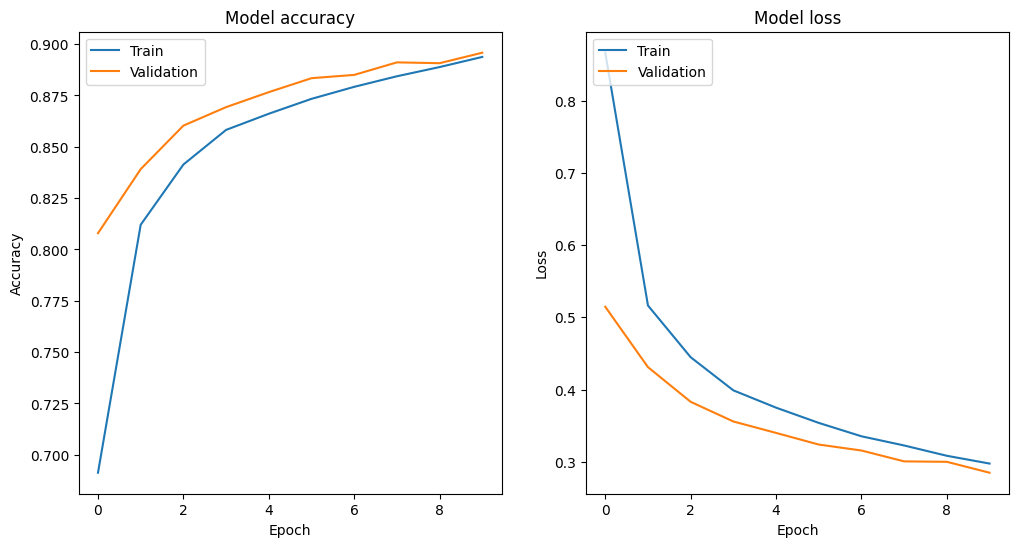

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 학습/검증 성능 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# 로스 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# 유저가 구매한 상품을 기반으로 비슷한 상품 추천
# 단순한 상황을 가정해, 유저가 하나의 아이템을 구매했다고 가정

user_purchases = {
    'user1': [44],
    'user2': [68],
    'user3': [13],
}

# 최종 출력 이전 레이어에서 출력값을 받아옴 -> 이미지의 hidden representation 획득
model_without_last_layer = tf.keras.Model(model.inputs, model.layers[-2].output)

In [ ]:
model_without_last_layer

In [ ]:
# 가장 가까운 n개의 아이템 조회
num_similar_items = 5

# 비교를 위해, 전체 아이템 중 100개의 아이템 랜덤 샘플링
random_indices = np.random.choice(len(x_train), 100, replace=False)

# 각각 랜덤 샘플된 아이템으로부터 임베딩을 계산 (모델에 투입함으로써))
random_item_embeddings = model_without_last_layer.predict(x_train[random_indices])


4/4 [==============================] - 0s 6ms/step


In [ ]:
random_item_embeddings[:1]

array([[0.00000000e+00, 1.28980173e-04, 4.15819057e-04, 2.01457238e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.83520499e-04,
        6.16104400e-04, 6.05971203e-04, 6.78112847e-04, 1.81760392e-04,
        0.00000000e+00, 0.00000000e+00, 2.13991720e-04, 3.67691682e-04,
        1.48894047e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.57753355e-04, 2.85370857e-04, 0.00000000e+00,
        0.00000000e+00, 5.55313425e-04, 1.88927850e-04, 0.00000000e+00,
        3.92840244e-04, 2.29320547e-04, 0.00000000e+00, 0.00000000e+00,
        4.10155801e-04, 0.00000000e+00, 3.91367386e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.35026465e-04,
        0.00000000e+00, 0.00000000e+00, 3.70734313e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.96525371e-04,
        7.62282434e-05, 8.14757892e-04, 7.43478653e-04, 3.053569

In [ ]:
user_purchases.items()

dict_items([('user1', [44]), ('user2', [68]), ('user3', [13])])

1/1 [==============================] - 0s 19ms/step

Purchased item by user1:


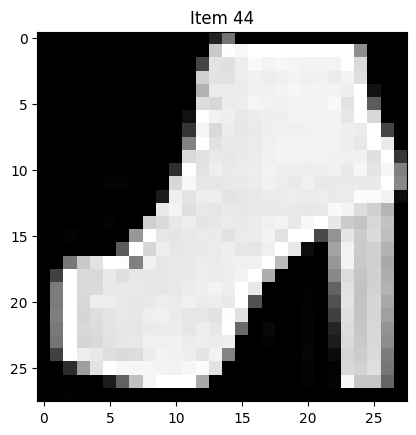

Most similar items to those purchased by user1:


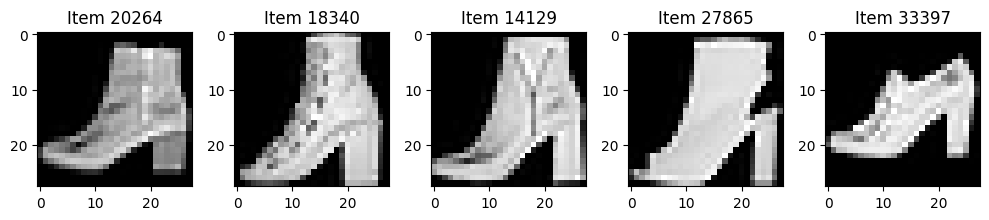

1/1 [==============================] - 0s 21ms/step

Purchased item by user2:


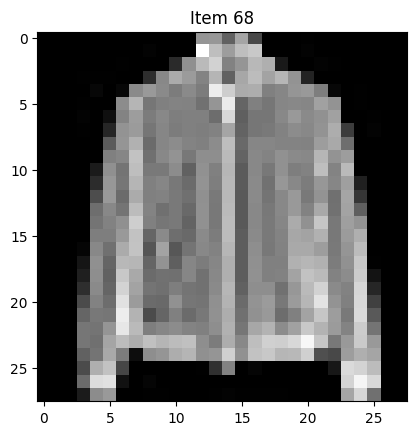

Most similar items to those purchased by user2:


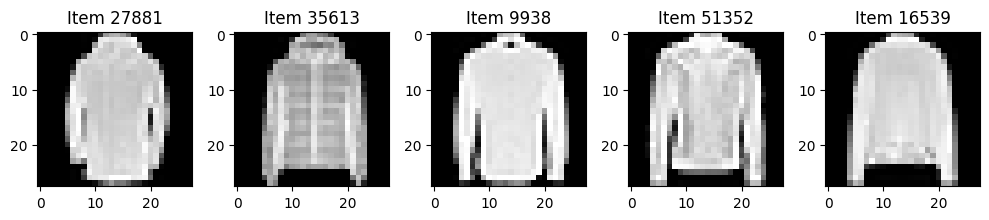

1/1 [==============================] - 0s 18ms/step

Purchased item by user3:


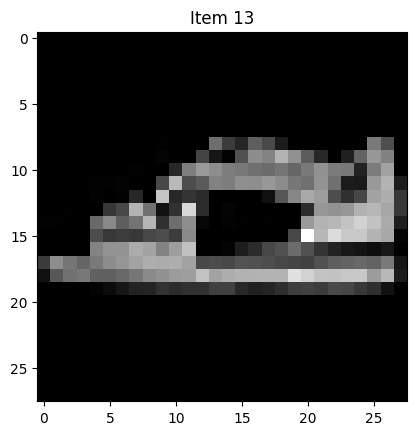

Most similar items to those purchased by user3:


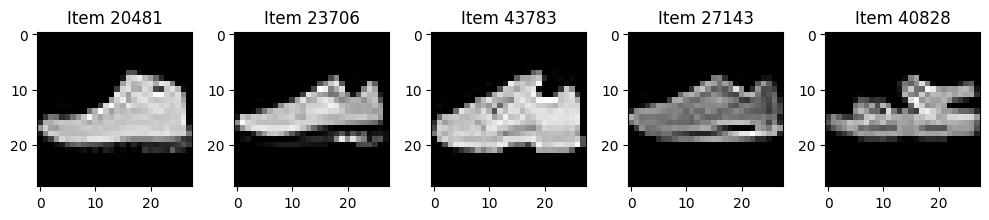

In [ ]:
for user, item_indices in user_purchases.items():
    # 각 유저가 구매한 아이템 임베딩 계산
    user_item_embeddings = model_without_last_layer.predict(x_train[np.array(item_indices)].reshape(-1, 28, 28, 1))

    # 유저의 아이템과 랜덤샘플된 아이템의 유사도 계산
    similarity = cosine_similarity(user_item_embeddings, random_item_embeddings)

    # 가장 유사한 아이템 n개의 인덱스
    top_similar_indices = np.argsort(similarity[0])[-num_similar_items:]

    # 유저에 의해 구매한 아이템의 이미지 출력
    print(f"\nPurchased item by {user}:")
    plt.imshow(x_train[item_indices[0]].reshape(28, 28), cmap='gray')
    plt.title(f"Item {item_indices[0]}")
    plt.show()

    # 해당 아이템과 유사한 top n개의 이미지 출력
    print(f"Most similar items to those purchased by {user}:")
    fig, axes = plt.subplots(1, num_similar_items, figsize=(10, 10))
    for idx, ax in zip(top_similar_indices, axes.flatten()):
        # 시각화
        ax.imshow(x_train[random_indices[idx]].reshape(28, 28), cmap='gray')
        ax.title.set_text(f"Item {random_indices[idx]}")
    plt.tight_layout()
    plt.show()


157/157 [==============================] - 1s 8ms/step


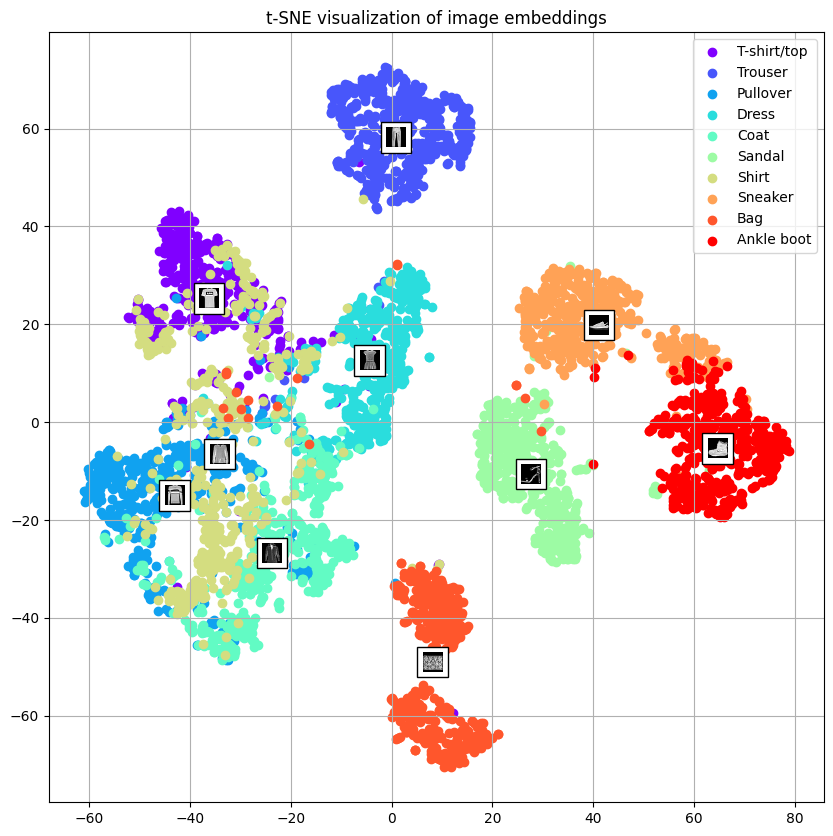

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy import ndimage

# 일부 샘플들만 가져오기
subset_size = 5000
x_subset = x_train[:subset_size]
y_subset = y_train[:subset_size]

# 임베딩 생성
subset_embeddings = model_without_last_layer.predict(x_subset)

# 차원 축소를 위한 t-SNE
tsne = TSNE(n_components=2, random_state=0)
subset_embeddings_2d = tsne.fit_transform(subset_embeddings)


# 시각화
plt.figure(figsize=(10, 10))
colors = cm.rainbow(np.linspace(0, 1, num_classes))

for i in range(num_classes):
    idxs = (y_subset == i)
    centroid = np.mean(subset_embeddings_2d[idxs], axis=0)
    plt.scatter(subset_embeddings_2d[idxs, 0], subset_embeddings_2d[idxs, 1], color=colors[i], label=class_names[i])

    # 중심점에 이미지 위치시키기
    imagebox = OffsetImage(x_subset[idxs][0].reshape(28,28), zoom=0.5, cmap='gray')
    ab = AnnotationBbox(imagebox, centroid)
    plt.gca().add_artist(ab)

plt.legend(loc='best')
plt.title('t-SNE visualization of image embeddings')
plt.grid(True)
plt.show()
